Design and Implementation of Philippine Banknote Sorting Process in Small-Medium Enterprise (SME)

Group: 
- Carolino, Jeanne May
- Enriquez, Sophia Mer
- Garcia, Almira Jill
- Herrera, Janna Rose
- Monter, John Paul - Lead

In [81]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.rcParams['figure.figsize'] = (10, 10) # set default size of plots

# img = Image.open(image_name)
# fig, ax = plt.subplots()
# ax.imshow(img)
# plt.show()

In [74]:
from collections import defaultdict
import json 

image_annotated = defaultdict(list) # Create a dictionary with default factory to store the annotations for each image

# Load the annotations that correspond to the image
annotation_path = './train/_annotations.coco.json'
inFile = open(annotation_path)

# Load the File as a json object
annotations = json.load(inFile) # dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

# Get the annotations for the image
# Loop through the annotations
for items in annotations['annotations']:
    image_id = items['image_id'] # Get the image id
    image_annotated[image_id].append(items) # Add the annotations to the dictionary
    # This Dictionary contains the id(no. of Image), image_id(same with ID), category_id(whether it is 20 [1], 50 [2], 100 [3], 200 [4], 500 [5], 1000 [6]), bbox(x,y,width,height) - this is the box for the banknotes, area - of the box, segmentation - is the lists of vertices of the object, iscrowd - if object is crowded (true (1) or false (0))

image_annotated

defaultdict(list,
            {0: [{'id': 0,
               'image_id': 0,
               'category_id': 5,
               'bbox': [0, 97, 134, 447],
               'area': 59898,
               'segmentation': [],
               'iscrowd': 0}],
             1: [{'id': 1,
               'image_id': 1,
               'category_id': 1,
               'bbox': [518, 0, 122, 445.5],
               'area': 54351,
               'segmentation': [],
               'iscrowd': 0}],
             2: [{'id': 2,
               'image_id': 2,
               'category_id': 5,
               'bbox': [196, 231, 125, 193],
               'area': 24125,
               'segmentation': [],
               'iscrowd': 0}],
             3: [{'id': 3,
               'image_id': 3,
               'category_id': 6,
               'bbox': [331, 0, 307, 176],
               'area': 54032,
               'segmentation': [],
               'iscrowd': 0}],
             5: [{'id': 4,
               'image_id': 5,
      

In [75]:
# Get the category names
category_names = dict() # Create a dictionary to store the category names

# Loop through the categories
for items in annotations['categories']: 
    category_names[items['id']] = items['name'] # {0: 'bills', 1: '20', 2: '50', 3: '100', 4: '200', 5: '500', 6: '1000'}

category_names

{0: 'bills', 1: '100', 2: '1000', 3: '20', 4: '200', 5: '50', 6: '500'}

[{'id': 6879, 'image_id': 7091, 'category_id': 1, 'bbox': [195, 460, 126.5, 180], 'area': 22770, 'segmentation': [], 'iscrowd': 0}]


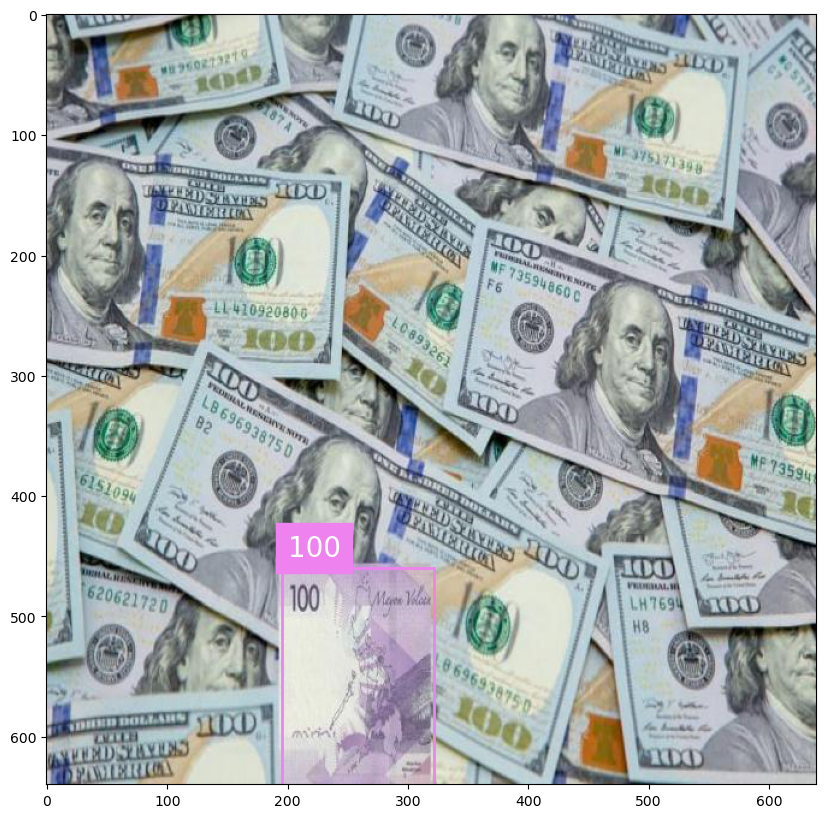

In [76]:
colour_dict = {
    '20': 'orange',
    '50': 'red',
    '100': 'violet',
    '200': 'green',
    '500': 'yellow',
    '1000': 'lightblue'
}

img_url = './train/100_6f02ef5268d9433abd44478126fe18c3_jpg.rf.152812f14f6decd9cd69742da6781647.jpg'
img_url_id = 7091

img = Image.open(img_url)
fig, ax = plt.subplots()

image_annotations = image_annotated[img_url_id] # Get the annotations for the image
print(image_annotations)
# Create a Bounding Box and Labels
for items in image_annotations:
    bounding_box = items['bbox'] # Get the bounding box (x, y, height, width)
    class_name = category_names[items['category_id']] # Get the class name
    
    # Coordinates of the Rectangle
    x = float(bounding_box[0])
    y = float(bounding_box[1])
    width = float(bounding_box[2])
    height = float(bounding_box[3])
    
    # Create a Rectangle patch
    plt.text(x+5, y-10, class_name, fontdict={'color': 'white', 'backgroundcolor': colour_dict[class_name], 'size': 20})
    rectangle_patch = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor=colour_dict[class_name], facecolor='none')
    ax.add_patch(rectangle_patch)
    
# Display the image
ax.imshow(img)
plt.show()

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
    
# y = dict()
# for items in image_annotated.values():
#     for iter in items:
#         for i in iter:
#             y[iter['id']] = iter['category_id']
X

{0: '50_da9888c614104dbead8eb585aec24302_jpg.rf.617d871d37476e646d6acdfff8ab911f.jpg',
 1: '100_eed608e6448e4370965c385ea038096c_jpg.rf.61a42761472f9bd806896bd88069af2d.jpg',
 2: '50_cbb68bafa85b401d8355684e2d927798_jpg.rf.618388d8428725935c62c4dfbc6d9ef6.jpg',
 3: '500_d63c7cd7c4ea4e8d8fd0442ee49bdb9e_jpg.rf.61845f728667466eb727eb2bab835f63.jpg',
 5: '1000_c4e14be1f5574a17890c263b62d7afeb_jpg.rf.619f14d0f375dc3c3292a94796037e65.jpg',
 6: '100_3d287c5c42d14f0ba432880bcc01f9f4_jpg.rf.61c563e264285d906e1c561005d15cd4.jpg',
 7: '1000_new_29030987818d40ef925f9bcfa05e053e_jpg.rf.61a268a00720bc8db3406abac588c831.jpg',
 8: '100_5f92daa607a847c7a99e1fb7ac3bc42b_jpg.rf.61dcc820f2af52e5bb209cd6710b34c2.jpg',
 9: '1000_89707fda63404c25a9a8c9a4de80fe83_jpg.rf.61c424a92c34268934192f5b217d33fe.jpg',
 10: '50_c3ebfca3d95545d98a90ae7a2f480166_jpg.rf.61bfe03c9f415a71f5206dc6c32a2850.jpg',
 11: '50_d84159d36b6d46bfaa6690c829b9c37f_jpg.rf.61ac95e60f896da16072e4e94fbd7888.jpg',
 12: '500_ae2cb2d7ff7f47d59

In [78]:
# get the category_id values inside the dictionary

llist2 = list(image_annotated.values())
llist3 = []
for items in llist2:
    for items2 in items:
        llist3.append(list(items2.values()))

llst = []
for items in llist3:
    llst.append(items[2])
    
listForImageID = []
for items in llist3:
    listForImageID.append(items[1])
    
X = dict()
i = -1
for items1 in listForImageID:
    for items2 in annotations['images']:
        if items1 == items2['id']:
            X[items2['id']] = items2['file_name']
    
X

{0: '50_da9888c614104dbead8eb585aec24302_jpg.rf.617d871d37476e646d6acdfff8ab911f.jpg',
 1: '100_eed608e6448e4370965c385ea038096c_jpg.rf.61a42761472f9bd806896bd88069af2d.jpg',
 2: '50_cbb68bafa85b401d8355684e2d927798_jpg.rf.618388d8428725935c62c4dfbc6d9ef6.jpg',
 3: '500_d63c7cd7c4ea4e8d8fd0442ee49bdb9e_jpg.rf.61845f728667466eb727eb2bab835f63.jpg',
 5: '1000_c4e14be1f5574a17890c263b62d7afeb_jpg.rf.619f14d0f375dc3c3292a94796037e65.jpg',
 6: '100_3d287c5c42d14f0ba432880bcc01f9f4_jpg.rf.61c563e264285d906e1c561005d15cd4.jpg',
 7: '1000_new_29030987818d40ef925f9bcfa05e053e_jpg.rf.61a268a00720bc8db3406abac588c831.jpg',
 8: '100_5f92daa607a847c7a99e1fb7ac3bc42b_jpg.rf.61dcc820f2af52e5bb209cd6710b34c2.jpg',
 9: '1000_89707fda63404c25a9a8c9a4de80fe83_jpg.rf.61c424a92c34268934192f5b217d33fe.jpg',
 10: '50_c3ebfca3d95545d98a90ae7a2f480166_jpg.rf.61bfe03c9f415a71f5206dc6c32a2850.jpg',
 11: '50_d84159d36b6d46bfaa6690c829b9c37f_jpg.rf.61ac95e60f896da16072e4e94fbd7888.jpg',
 12: '500_ae2cb2d7ff7f47d59

SPLIT THE DATASET
- Train
- Valid
- Test

In [79]:
# Split the Datasets
trainedY = pd.DataFrame(llst)

trainedX = pd.DataFrame(X.values())

# Split the Datasets to Train and Test
X_train, X_test, y_train, y_test,  = train_test_split(trainedX, trainedY, test_size=0.3, random_state=1)

# Split the Datasets to Train and Valid
X_train, X_valid, y_train, y_valid,  = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

X_train #7935 images

,0
10590,200_7ed6b5ce6e7a41fc864a89a4c66f23a0_jpg.rf.d3...
10381,50_2f35965a61524daba0168f54730a052c_jpg.rf.cff...
7230,1000_new_66e10dc51b294e778063409272078109_jpg....
1981,100_af03ae913a5348fcbd58174e4e1e1b90_jpg.rf.e1...
10771,1000_new_75bb5b090dff4aa8be18b29a71a040c9_jpg....
...,...
6740,1000_b55bbe28cbca4dacbb238e81b5f5ba37_jpg.rf.1...
7791,50_e174c0ee7e8c4c7d8f84bb564a9c4951_jpg.rf.454...
12307,500_abc0d43418b14bb99746d34dfd81f120_jpg.rf.91...
4125,20_a6a98b57f5324c47ad50832267003c4e_jpg.rf.26a...


In [66]:
y_train # 7935 images

,0
10590,4
10381,5
7230,2
1981,1
10771,2
...,...
6740,2
7791,5
12307,6
4125,3


In [67]:
X_test # 4536 category_ids

,0
13618,200_88ee3ce0d07946799f544a11c2650f07_jpg.rf.a7...
9510,100_860309ca6eb64c68840954c57e502220_jpg.rf.c1...
12168,1000_b21e9ecf19fd43f5b3d7ec3ef934b925_jpg.rf.8...
407,1000_2f6ee1772d8d4354878e0025fb8b0ee2_jpg.rf.6...
6116,100_9cf2f9bae7c74801b694b2e72ca96acc_jpg.rf.07...
...,...
12018,20_4ac64114615740a3bc255648ad7c3fec_jpg.rf.8cd...
11185,1000_4e9954e0f7b8423a926b9d3a2c6fced7_jpg.rf.d...
311,1000_4a1fba080787439f9b5a644fbc15e1e6_jpg.rf.6...
5851,1000_new_01e67103f2344b46a51aede101dcaf57_jpg....


In [68]:
y_test # 4536 category_ids

,0
13618,4
9510,1
12168,2
407,2
6116,1
...,...
12018,3
11185,2
311,2
5851,2


In [69]:
X_valid # 2646 category_ids

,0
11090,500_2483e74df12743568af00cafc7b5fb91_jpg.rf.db...
7651,100_adf3006e914042b88fdad95ff0c325cd_jpg.rf.42...
9580,100_7476ec1eb2704fc4a7be3bdb4b6dd975_jpg.rf.c2...
4514,1000_7af612ccfd184534bed527e6554ea552_jpg.rf.2...
11222,500_05ac28f2135442c3b1010d797a6bd489_jpg.rf.dd...
...,...
5488,20_b5d84121fb1c4ec38fb1c1f076be45bd_jpg.rf.3dc...
5609,20_a361b4ed14b84e75bbeeefc2ea16bce9_jpg.rf.3fe...
13111,50_a6fdbb1bebcd419397741d0f0024568a_jpg.rf.9ef...
1528,500_57d421d8ce6c430c8380cd4f62d46c26_jpg.rf.7b...


In [70]:
y_valid # 2646

,0
11090,6
7651,1
9580,1
4514,2
11222,6
...,...
5488,3
5609,3
13111,5
1528,6


In [84]:
#training model

print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [1]:
!pip list

Package                  Version
------------------------ ---------
absl-py                  1.4.0
aiofiles                 22.1.0
aiohttp                  3.8.5
aiosignal                1.2.0
aiosqlite                0.18.0
anyio                    3.5.0
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
asttokens                2.0.5
astunparse               1.6.3
async-timeout            4.0.2
attrs                    22.1.0
Babel                    2.11.0
backcall                 0.2.0
beautifulsoup4           4.12.2
bleach                   4.1.0
blinker                  1.4
Bottleneck               1.3.5
brotlipy                 0.7.0
cachetools               4.2.2
category-encoders        2.6.1
certifi                  2022.12.7
cffi                     1.15.1
chardet                  4.0.0
charset-normalizer       2.0.4
click                    8.0.4
colorama                 0.4.6
comm                     0.1.2
contourpy                1.0.5
cryptography           